In [1]:
import sys 

import numpy as np
import pandas as pd
import anndata
from copy import copy
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import scanpy as sc
from scipy.sparse import hstack
import scvelo as scv
from scipy import sparse

sys.path.extend(["../../..", "."])
from paths import DATA_DIR

In [2]:
DATA_DIR

PosixPath('/nfs/homedirs/pala/scCFM/project_dir/data')

In [7]:
folder = DATA_DIR / "cite" / "rawdata" / "cite.h5ad"
metadata = DATA_DIR / "cite" / "metadata.csv"

In [29]:
adata = sc.read_h5ad(folder)
adata

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [50]:
adata.obs.QCMeds

CCTCTAGTCTCGTCAC-1-s4d9    False
TTAGTCTAGGTCCCTG-1-s4d9    False
GGGACTCGTTGGCCGT-1-s4d9    False
TACGGGCTCAGTCACA-1-s4d9    False
TACCGGGAGGTCGACA-1-s4d9    False
                           ...  
GAATCACCACGGAAGT-1-s4d9    False
GCTGGGTGTACGGATG-1-s4d9    False
TCGAAGTGTGACAGGT-1-s4d9    False
GCAGGCTGTTGCATAC-1-s4d9    False
ACGTAACAGGTCTACT-1-s4d9    False
Name: QCMeds, Length: 7365, dtype: category
Categories (1, object): ['False']

In [51]:
for i in adata.obs.index:
    print(i)

CCTCTAGTCTCGTCAC-1-s4d9
TTAGTCTAGGTCCCTG-1-s4d9
GGGACTCGTTGGCCGT-1-s4d9
TACGGGCTCAGTCACA-1-s4d9
TACCGGGAGGTCGACA-1-s4d9
AAGCGTTGTCACTTAG-1-s4d9
ACTTCGCCAGGTTCCG-1-s4d9
TACGGTAAGGCTTAGG-1-s4d9
GGAGAACTCCATACTT-1-s4d9
TACGCTCCATAGATGA-1-s4d9
GCGTTTCGTGTTGAGG-1-s4d9
CCTAAGACAGGTCTCG-1-s4d9
GGGACCTCACATAACC-1-s4d9
TCTCAGCTCGCAGAGA-1-s4d9
GTATTGGGTGAGACCA-1-s4d9
TCTATACGTATCGCGC-1-s4d9
GTAGGTTGTCGGTAAG-1-s4d9
CACTGGGCATCCAACA-1-s4d9
CAACGATGTAGCGATG-1-s4d9
CCACAAAAGAGATTCA-1-s4d9
TACTTGTTCTCTCCGA-1-s4d9
TCCGTGTGTACGGCAA-1-s4d9
GTCGAATGTACCCACG-1-s4d9
TGCAGTAGTCTGCCTT-1-s4d9
AGAAGCGCAGGTGAGT-1-s4d9
GTCTCACCATTCTGTT-1-s4d9
TTATTGCGTGCGGTAA-1-s4d9
AGGGCCTTCCTCACTG-1-s4d9
GTTGTCCAGCCTCTTC-1-s4d9
TGTGATGTCTCCAATT-1-s4d9
GTCTTTAAGTCACTGT-1-s4d9
AGAGCCCTCCCGAAAT-1-s4d9
TATCCTACATCTATCT-1-s4d9
TATCCTAGTCGATGCC-1-s4d9
CGTGCTTAGCAACTCT-1-s4d9
CTTCCGAAGGTGGGTT-1-s4d9
ATGATCGGTTGCATCA-1-s4d9
GCGGATCAGGATCACG-1-s4d9
TGGTTAGCATATAGCC-1-s4d9
GCTACCTAGATGCCGA-1-s4d9
ATACCGATCTCTTAAC-1-s4d9
AACGAAAGTAATCAAG

In [10]:
metadata_file = pd.read_csv(metadata)

In [28]:
metadata_file.loc[metadata_file.technology=="citeseq"]

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq
...,...,...,...,...,...
119646,a9b4d99f1f50,7,31800,HSC,citeseq
119647,0e2c1d0782af,7,31800,HSC,citeseq
119648,a3cbc5aa0ec3,7,31800,MkP,citeseq
119649,75b350243add,7,31800,EryP,citeseq


In [7]:
np.unique(adata.obs.batch)

array(['s1d1', 's1d2', 's1d3', 's2d1', 's2d4', 's2d5', 's3d1', 's3d6',
       's3d7', 's4d1', 's4d8', 's4d9'], dtype=object)

In [35]:
adata = adata[adata.obs.DonorID==13272]

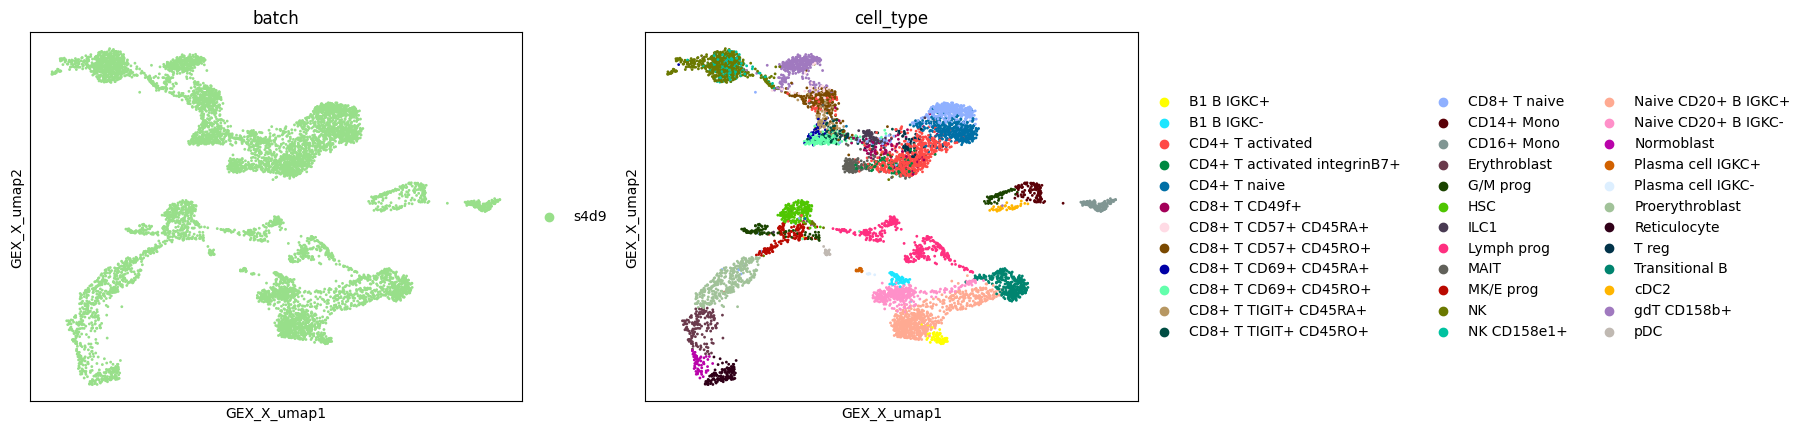

In [36]:
sc.pl.embedding(adata, basis="GEX_X_umap", color=["batch", "cell_type"])